# 3-Phase Coupling Function

In [1]:
using DelayDiffEq
using PyPlot
using FileIO
include("GalerkinFuncs.jl");

In [2]:
# Load the parameters
params = load("phaseSensitivity.jld2", "params");
γ = 1.4
Ma = 0.005

┌ Warning: some parameters could not be resolved for type DDEProblem{Array{Float64,1},Tuple{Float64,Float64},Array{Float64,1},Tuple{},false,modelParameters,DDEFunction{false,typeof(RHS),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing},Main.#h,Base.Iterators.Pairs{Symbol,Float64,Tuple{Symbol},NamedTuple{(:reltol,),Tuple{Float64}}}}; reconstructing
└ @ JLD2 /home/amtcss/.julia/packages/JLD2/aRhgS/src/data.jl:1242
┌ Warning: some parameters could not be resolved for type DelayDiffEq.ODEFunctionWrapper{false,typeof(RHS),Main.#h,UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing}; reconstructing
└ @ JLD2 /home/amtcss/.julia/packages/JLD2/aRhgS/src/data.jl:1242
┌ Warning: some parameters could not be resolved for type DelayDiffEq.ODEFunctionWrapper{false,typeof(RHS),DelayDiffEq.HistoryFunction{Main.#h,DelayDiffEq.HistoryODEIntegrator{Vern6,false,Array{Float64,1},Float64,Floa

0.005

In [3]:
# Create the forcing function
fn = zeros(2*params.N)
for i in 1:params.N
    fn[params.N+i] = 1
end

fEng = energy(fn,params)
println("Orig norm = ",energy(fn,params))
fn = fn/sqrt(fEng)
println("Unit norm = ",energy(fn,params))
# Put the phase sensitivity normalisation in the forcing to get the correct
# phase coupling function
g(t)  = cos(t)*fn*params.phaseSensNorm
println(params.phaseSensNorm)
println(fEng)

Orig norm = 0.07851215044624711
Unit norm = 1.0000000000000002
0.9979874809000634
0.07851215044624711


In [4]:
# Calculate the phase coupling function
NT = 400
tRange = range(0,stop=params.T,length=NT) 
Γ11 = zeros(NT)

for (i,t) in enumerate(tRange)
    Γ11[i] = phaseCouplingFunction(t,1,g,params)
end

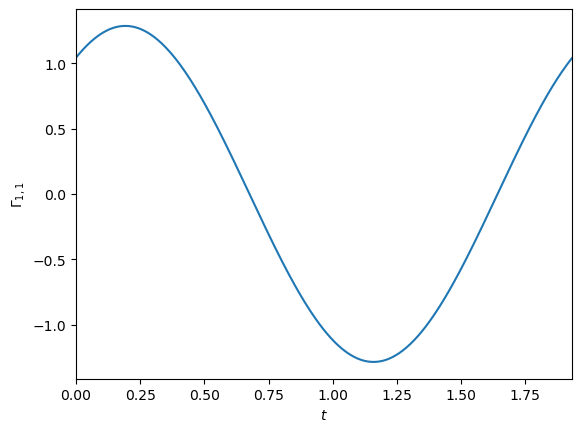

(0.0, 1.9323671497584543)

In [5]:
plot(tRange,Γ11)
xlabel(L"t")
ylabel(L"$\Gamma_{1,1}$")
xlim([0,params.T])

In [6]:
g(t) = cos(2*t)*fn*params.phaseSensNorm
# Calculate the phase coupling function
Γ21 = zeros(NT)
for (i,t) in enumerate(tRange)
    Γ21[i] = phaseCouplingFunctionmn(t,2,g,2,1,params)
end

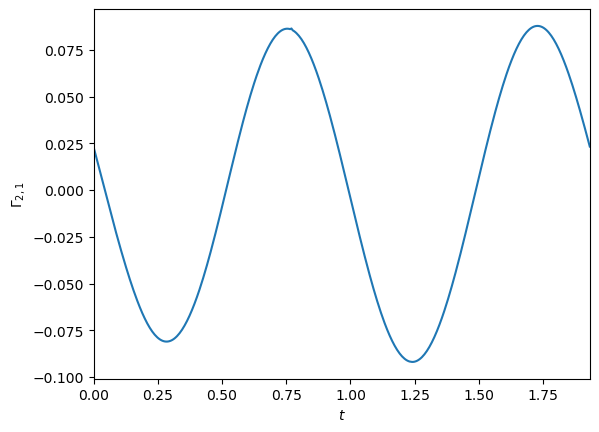

(0.0, 1.9323671497584543)

In [7]:
plot(tRange,10*Γ21)
xlabel(L"t")
ylabel(L"$\Gamma_{2,1}$")
xlim([0,params.T])

In [8]:
g(t) = cos(3*t)*fn*params.phaseSensNorm
# Calculate the phase coupling function
Γ31 = zeros(NT)
for (i,t) in enumerate(tRange)
    Γ31[i] = phaseCouplingFunctionmn(t,3,g,3,1,params)
end

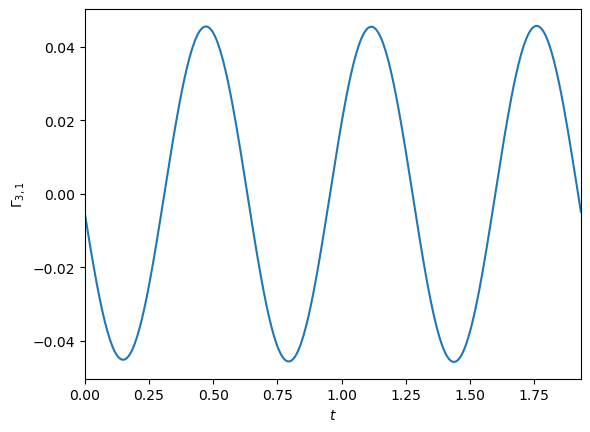

(0.0, 1.9323671497584543)

In [9]:
plot(tRange,Γ31)
xlabel(L"t")
ylabel(L"$\Gamma_{3,1}$")
xlim([0,params.T])

In [10]:
g(t) = cos(0.5*t)*fn*params.phaseSensNorm
# Calculate the phase coupling function
Γ12 = zeros(NT)
for (i,t) in enumerate(tRange)
    Γ12[i] = phaseCouplingFunctionmn(t,0.5,g,1,2,params)
end

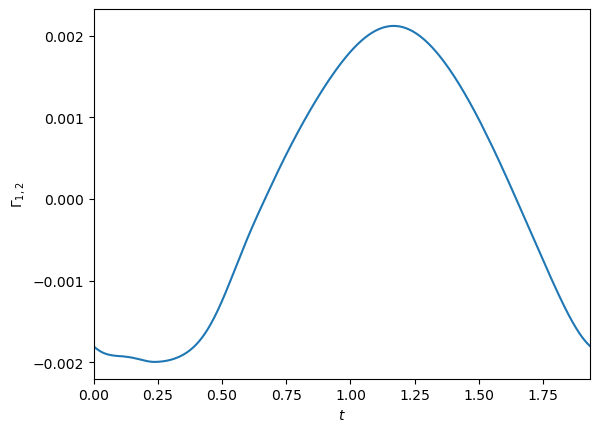

(0.0, 1.9323671497584543)

In [11]:
plot(tRange,Γ12)
xlabel(L"t")
ylabel(L"$\Gamma_{1,2}$")
xlim([0,params.T])

# Arnold tongues

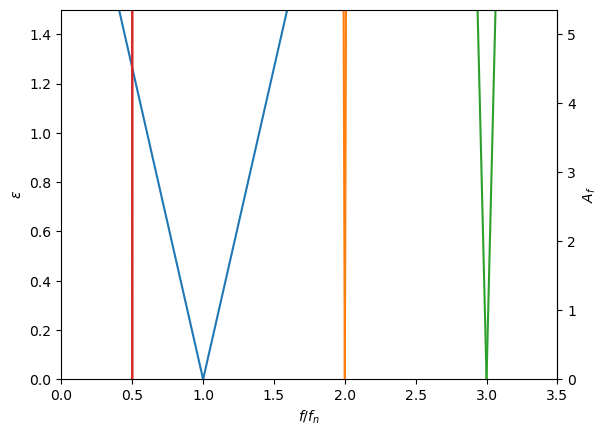

3.2515483964654357

PyObject <matplotlib.axes._secondary_axes.SecondaryAxis object at 0x7f60395a6b20>

In [12]:
ωn = 2π/params.T
print(ωn)
freqs = range(0,stop=4,length=40) 
ΓMax = maximum(Γ11)
ΓMin = minimum(Γ11)
plot(freqs,(ωn/ΓMax)*(freqs.-1),"C0")
plot(freqs,(ωn/ΓMin)*(freqs.-1),"C0")

ΓMax = maximum(Γ21)
ΓMin = minimum(Γ21)
plot(freqs,(ωn/ΓMax)*((1/2)*freqs.-1),"C1")
plot(freqs,(ωn/ΓMin)*((1/2)*freqs.-1),"C1")

ΓMax = maximum(Γ31)
ΓMin = minimum(Γ31)
plot(freqs,(ωn/ΓMax)*((1/3)*freqs.-1),"C2")
plot(freqs,(ωn/ΓMin)*((1/3)*freqs.-1),"C2")

ΓMax = maximum(Γ12)
ΓMin = minimum(Γ12)
plot(freqs,(ωn/ΓMax)*(2*freqs.-1),"C3")
plot(freqs,(ωn/ΓMin)*(2*freqs.-1),"C3")

ylim([0, 1.5])
xlim([0,3.5])
xlabel(L"$f/f_n$")
ylabel(L"$\epsilon$")

ax = gca()
eps2Af(e) = e/sqrt(fEng)
Af2eps(e) = e*sqrt(fEng)
ax2 = ax.secondary_yaxis(location="right",functions=(eps2Af,Af2eps),ylabel=L"A_f")